# Setup Code

In [3]:
from ipywidgets import interact
from fastai.basics import *

plt.rc('figure', dpi=90)

def plot_function(f, title=None, min=-2.1, max=2.1, color='r', ylim=None):
    x = torch.linspace(min,max, 100)[:,None]
    if ylim: plt.ylim(ylim)
    plt.plot(x, f(x), color)
    if title is not None: plt.title(title)

# Plot a simple graph

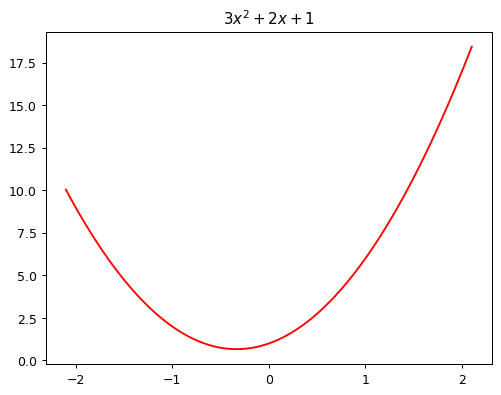

In [2]:
def f(x): return 3*x**2 + 2*x + 1

plot_function(f, "$3x^2 + 2x + 1$")

In [14]:
def quad (a, b, c, x): return a*x**2 + b*x + c

In [15]:
quad(3, 2, 1, 1.5)

10.75

In [16]:
from functools import partial
def mk_quad(a, b, c): return partial(quad, a, b, c)

In [18]:
f = mk_quad(3, 2, 1)
f(1.5)

10.75

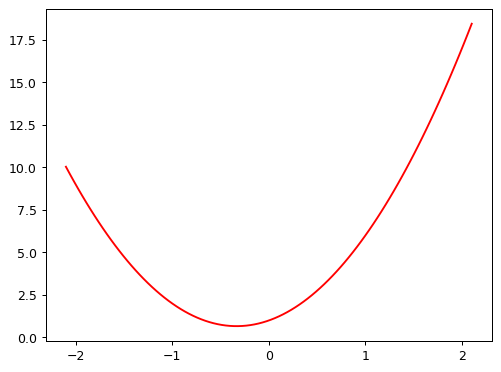

In [19]:
plot_function(f)

In [20]:
from numpy.random import normal, seed, uniform
np.random.seed(42)
def noise(x, scale): return normal(scale = scale, size=x.shape)
def add_noise(x, mult, add): return x * (1 + noise(x, mult)) + noise(x, add)

/tmp/ipython-input-585417136.py:4: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  def add_noise(x, mult, add): return x * (1 + noise(x, mult)) + noise(x, add)


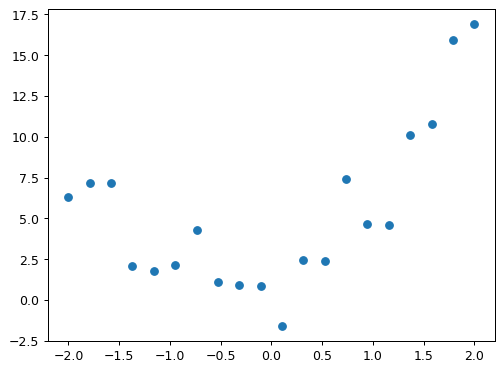

In [29]:
x = torch.linspace(-2,2,steps = 20)[:,None]
y = add_noise(f(x), 0.3, 1.5)
plt.scatter(x, y)

In [ ]:
def mse(preds, acts): return ((preds-acts)**2).mean()

In [43]:
@interact(a=1.5, b=1.5, c=1.5)
def plot_quad(a, b, c):
    f = mk_quad(a, b, c)
    plt.scatter(x, y)
    loss = mse(f(x), y)
    plot_function(mk_quad(a, b, c), ylim=(-3,12), title=f"MSE: {loss:.2f}")

interactive(children=(FloatSlider(value=1.5, description='a', max=4.5, min=-1.5), FloatSlider(value=1.5, descr…

In [47]:
def quad_mse(params):
    f = mk_quad(*params)
    return mse(f(x), y)

In [48]:
quad_mse([1.5, 1.5, 1.5])

tensor(9.2842, dtype=torch.float64)

In [51]:
#rank 1 tensor
abc = torch.tensor([1.5, 1.5, 1.5])
abc.requires_grad_()

tensor([1.5000, 1.5000, 1.5000], requires_grad=True)

In [52]:
loss = quad_mse(abc)
loss

tensor(9.2842, dtype=torch.float64, grad_fn=<MeanBackward0>)

In [53]:
loss.backward()

In [55]:
abc.grad

tensor([-9.5563, -1.8268, -3.3216])

In [57]:
with torch.no_grad():
    abc -= abc.grad * 0.01
    loss = quad_mse(abc)

print(f'loss={loss:.2f}')

loss=8.27


In [58]:
for i in range(5):
    loss = quad_mse(abc)
    loss.backward()
    with torch.no_grad(): abc -= abc.grad * 0.01
    print(f'step = {i}; 'f'loss={loss:.2f}')

step = 0; loss=8.27
step = 1; loss=6.60
step = 2; loss=4.84
step = 3; loss=3.58
step = 4; loss=3.26


In [59]:
abc

tensor([2.9778, 1.8473, 1.9793], requires_grad=True)

In [ ]:
# Rectified Linear Unit

In [60]:
def rectified_linear(m,b,x): 
    y = m*x+b
    return torch.clip(y, 0.)